## Seam Carving Implementation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import scipy
import scipy.sparse.linalg
import ipywidgets as widgets
import seam_carving

## 1. Upload your own photo

In [2]:
# User TODO: Run this block and upload your own picture using the upload widget

pic_upload = widgets.FileUpload(accept="image/*", multiple=False)
pic_upload

FileUpload(value=(), accept='image/*', description='Upload')

In [3]:
pic_upload.value

({'name': 'sky_planes.jpeg',
  'type': 'image/jpeg',
  'size': 71191,
  'content': <memory at 0x7fa565e40b80>,
  'last_modified': datetime.datetime(2023, 10, 25, 22, 34, 31, 849000, tzinfo=datetime.timezone.utc)},)

In [17]:
if len(pic_upload.value) == 1:
    content = pic_upload.value[0]['content'].tobytes()

    np_array = np.frombuffer(content, np.uint8)
    original = cv2.cvtColor(cv2.imdecode(np_array, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    running_im = np.copy(original)
else:
    print("Error: Please upload 1 picture")

In [18]:
# User TODO: Choose your width % to decrease by

desired_width = widgets.IntText(
    value=90,
    min=0,
    max=100,
    description='Width %:',
    disabled=False
)

desired_width

IntText(value=90, description='Width %:')

In [19]:
# User TODO: Choose your height % to decrease by

desired_height = widgets.IntText(
    value=90,
    min=0,
    max=100,
    description='Height %:',
    disabled=False
)

desired_height

IntText(value=90, description='Height %:')

In [20]:
width_seams = round(np.shape(original)[1] * (100 - desired_width.value) * 0.01)
height_seams = round(np.shape(original)[0] * (100 - desired_height.value) * 0.01)
width_seams, height_seams

(333, 514)

In [21]:
for i in range(width_seams):
    seam, width_energypaths = seam_carving.findseam(running_im)
    running_im = seam_carving.removeseam(running_im,seam)

In [22]:
# Rotate image to get horizontal seams to remove
rot_im = np.rot90(running_im, 1)

for i in range(height_seams):
    seam, height_energypaths = seam_carving.findseam(rot_im)
    rot_im = seam_carving.removeseam(rot_im,seam)
    
running_im = np.rot90(rot_im, 3)

(-0.5, 777.5, 342.5, -0.5)

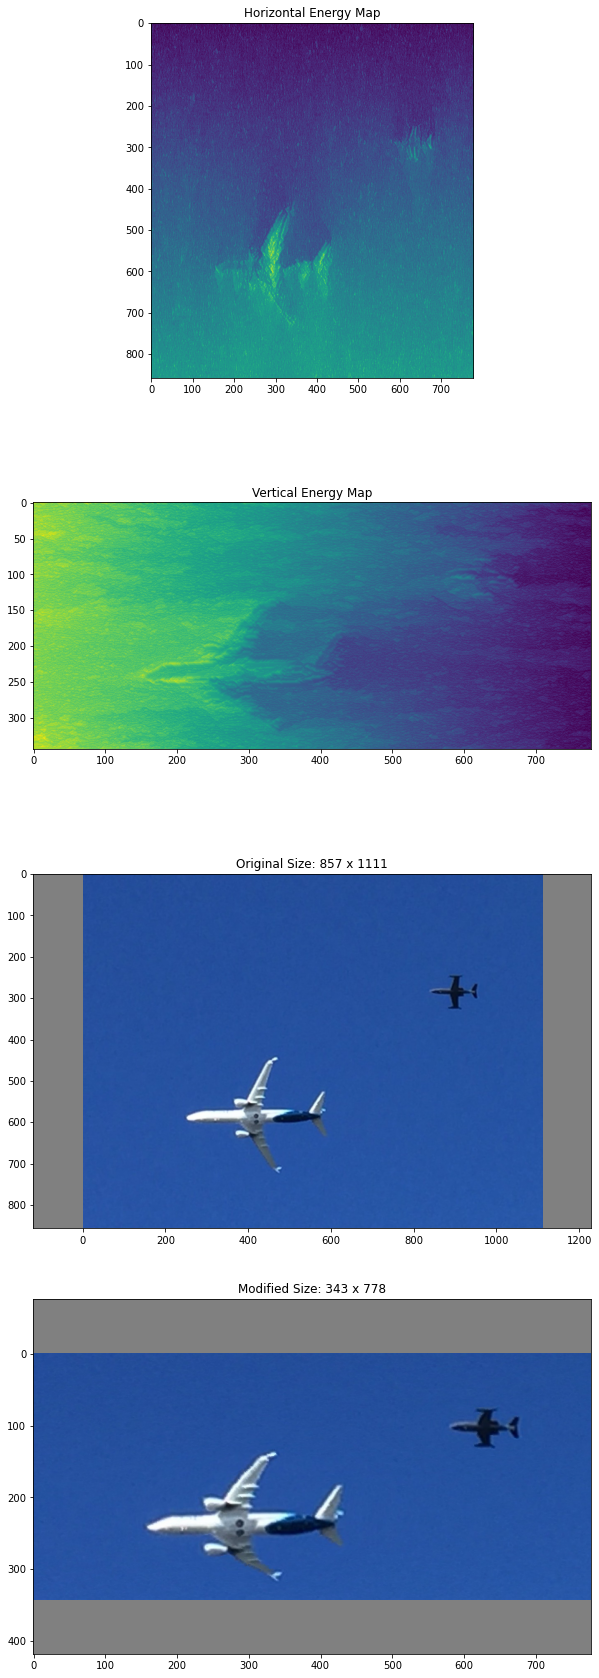

In [23]:
plt.figure(figsize=(10,30))
plt.subplot(4,1,1)
plt.imshow(width_energypaths)
plt.title('Horizontal Energy Map')

plt.subplot(4,1,2)
plt.imshow(np.rot90(height_energypaths,3))
plt.title('Vertical Energy Map')

plt.subplot(4,1,3,facecolor='gray')
plt.imshow(original)
plt.title(f'Original Size: {np.shape(original)[0]} x {np.shape(original)[1]}')
plt.axis('equal')

plt.subplot(4,1,4,facecolor='gray')
plt.imshow(running_im)
plt.title(f'Modified Size: {np.shape(running_im)[0]} x {np.shape(running_im)[1]}')
plt.axis('equal')